# Import Libraries

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading in CSV file

In [64]:
df = pd.read_csv('data/mental-health-data.csv')

In [65]:
df

,Age,Gender,Family_History,Sought_Treatment,Interferes_Work,Emp_Provide_Resources,Negative_Consequence,Discuss_w_Coworkers,Discuss_w_Supervisor
0,37,Female,No,Yes,Often,Yes,No,Some of them,Yes
1,44,M,No,No,Rarely,Don't know,Maybe,No,No
2,32,Male,No,No,Rarely,No,No,Yes,Yes
3,31,Male,Yes,Yes,Often,No,Yes,Some of them,No
4,31,Male,No,No,Never,Don't know,No,Some of them,Yes
...,...,...,...,...,...,...,...,...,...
1255,32,Male,Yes,Yes,Often,No,No,Some of them,Yes
1256,34,male,Yes,Yes,Sometimes,No,Yes,No,No
1257,46,f,No,No,NaN,No,Yes,No,No
1258,25,Male,Yes,Yes,Sometimes,No,Maybe,Some of them,No


# Data Cleaning

In [66]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [67]:
df['Gender'].replace(['Female', 'female', 'Trans-female', 'Cis Female', 'F', 'Woman', 'f',
                     'Femake', 'woman','Female ','cis-female/femme','Trans woman','Female (trans)',
                     'Female (cis)', 'femail'], 'Female', inplace=True)

In [68]:
df['Gender'].replace(['M','Male','male','m','Male-ish','maile','Cis Male','Mal','Male (CIS)',
                     'Make','Man','msle','Mail','cis male','Malr','Cis Man','Make','Male '], 'Male', inplace=True)

In [69]:
df['Gender'].replace(['something kinda male?', 'queer/she/they','non-binary','Nah','All','Enby',
                     'fluid','Genderqueer','Androgyne','Agender','Guy (-ish) ^_^',
                     'male leaning androgynous','Neuter','queer','A little about you','p',
                     'ostensibly male, unsure what that really means'], 'Other', inplace=True)

In [70]:
print(df['Gender'].unique())

['Female' 'Male' 'Other']


In [71]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [72]:
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)

In [73]:
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [74]:
df.isnull()

,Age,Gender,Family_History,Sought_Treatment,Interferes_Work,Emp_Provide_Resources,Negative_Consequence,Discuss_w_Coworkers,Discuss_w_Supervisor
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1255,False,False,False,False,False,False,False,False,False
1256,False,False,False,False,False,False,False,False,False
1257,False,False,False,False,True,False,False,False,False
1258,False,False,False,False,False,False,False,False,False


In [75]:
df.isnull().any()

Age                      False
Gender                   False
Family_History           False
Sought_Treatment         False
Interferes_Work           True
Emp_Provide_Resources    False
Negative_Consequence     False
Discuss_w_Coworkers      False
Discuss_w_Supervisor     False
dtype: bool

In [76]:
print(df['Interferes_Work'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' nan]


In [77]:
df['Interferes_Work'] = df['Interferes_Work'].fillna('Not sure')

In [78]:
print(df['Interferes_Work'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' 'Not sure']


In [79]:
df.isnull().any()

Age                      False
Gender                   False
Family_History           False
Sought_Treatment         False
Interferes_Work          False
Emp_Provide_Resources    False
Negative_Consequence     False
Discuss_w_Coworkers      False
Discuss_w_Supervisor     False
dtype: bool

# Data Visualization

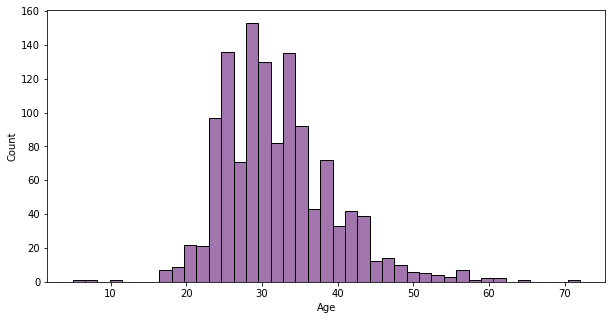

In [80]:
plt.figure(figsize = (10,5))
sns.set_palette("PRGn")
sns.histplot(data = df, x="Age")
plt.show()

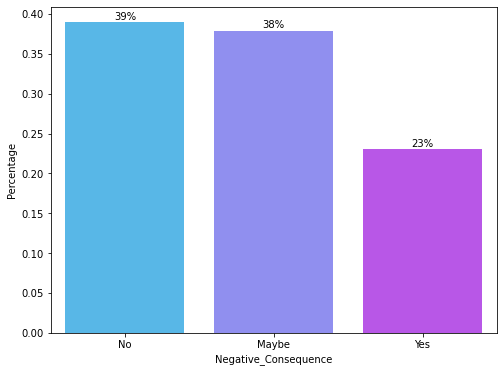

In [85]:
plt.figure(figsize = (8,6))
eda_percent = df['Negative_Consequence'].value_counts(normalize = True).rename_axis('Negative_Consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Negative_Consequence', y = 'Percentage', data = eda_percent, palette = 'cool')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center')
    

In [86]:
print(df['Interferes_Work'].value_counts())

Sometimes    465
Not sure     263
Never        213
Rarely       173
Often        141
Name: Interferes_Work, dtype: int64


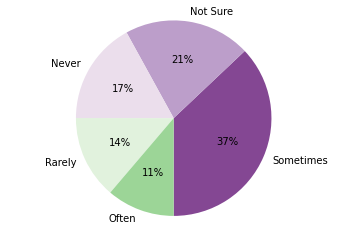

In [88]:
labels = ('Sometimes', 'Not Sure', 'Never', 'Rarely', 'Often' )
sizes = 465, 263, 213, 173, 141

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=270)
ax1.axis('equal')
plt.show()

## Creating Heatmap

In [89]:
df_heat = df[['Age', 'Gender', 'Family_History', 'Sought_Treatment', 'Interferes_Work', 
              'Emp_Provide_Resources','Negative_Consequence', 'Discuss_w_Coworkers',
              'Discuss_w_Supervisor']].copy()

In [90]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'Family_History', 'Sought_Treatment', 'Interferes_Work', 
              'Emp_Provide_Resources','Negative_Consequence', 'Discuss_w_Coworkers',
              'Discuss_w_Supervisor']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [91]:
df

,Age,Gender,Family_History,Sought_Treatment,Interferes_Work,Emp_Provide_Resources,Negative_Consequence,Discuss_w_Coworkers,Discuss_w_Supervisor
0,37,0,0,1,2,2,1,1,2
1,44,1,0,0,3,0,0,0,0
2,32,1,0,0,3,1,1,2,2
3,31,1,1,1,2,1,2,1,0
4,31,1,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...
1255,32,1,1,1,2,1,1,1,2
1256,34,1,1,1,4,1,2,0,0
1257,46,0,0,0,1,1,2,0,0
1258,25,1,1,1,4,1,0,1,0


<AxesSubplot:>

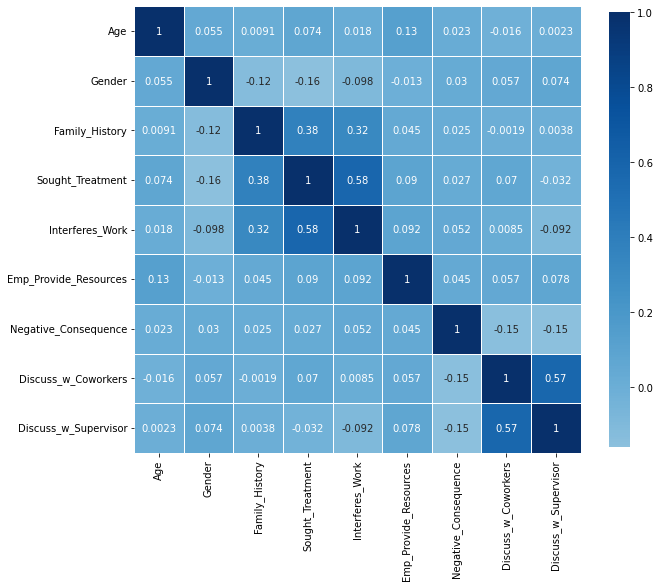

In [93]:
df_heat = df.corr()

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df_heat, cmap='Blues', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, annot = True)

# Decision Tree for Classification

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import preprocessing

In [115]:
categories =['Age', 'Gender', 'Family_History', 'Sought_Treatment', 'Interferes_Work', 
             'Emp_Provide_Resources','Negative_Consequence', 'Discuss_w_Coworkers', 
             'Discuss_w_Supervisor']

In [116]:
labelEncoder = preprocessing.LabelEncoder()

In [117]:
df

,Age,Gender,Family_History,Sought_Treatment,Interferes_Work,Emp_Provide_Resources,Negative_Consequence,Discuss_w_Coworkers,Discuss_w_Supervisor
0,37,0,0,1,2,2,1,1,2
1,44,1,0,0,3,0,0,0,0
2,32,1,0,0,3,1,1,2,2
3,31,1,1,1,2,1,2,1,0
4,31,1,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...
1255,32,1,1,1,2,1,1,1,2
1256,34,1,1,1,4,1,2,0,0
1257,46,0,0,0,1,1,2,0,0
1258,25,1,1,1,4,1,0,1,0


In [118]:
mapping_dict = {}
for col in categories:
    df[col] = labelEncoder.fit_transform(df[col])
    name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col] = name_mapping
print(mapping_dict)

{'Age': {5: 0, 8: 1, 11: 2, 18: 3, 19: 4, 20: 5, 21: 6, 22: 7, 23: 8, 24: 9, 25: 10, 26: 11, 27: 12, 28: 13, 29: 14, 30: 15, 31: 16, 32: 17, 33: 18, 34: 19, 35: 20, 36: 21, 37: 22, 38: 23, 39: 24, 40: 25, 41: 26, 42: 27, 43: 28, 44: 29, 45: 30, 46: 31, 47: 32, 48: 33, 49: 34, 50: 35, 51: 36, 53: 37, 54: 38, 55: 39, 56: 40, 57: 41, 58: 42, 60: 43, 61: 44, 62: 45, 65: 46, 72: 47}, 'Gender': {0: 0, 1: 1, 2: 2}, 'Family_History': {0: 0, 1: 1}, 'Sought_Treatment': {0: 0, 1: 1}, 'Interferes_Work': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}, 'Emp_Provide_Resources': {0: 0, 1: 1, 2: 2}, 'Negative_Consequence': {0: 0, 1: 1, 2: 2}, 'Discuss_w_Coworkers': {0: 0, 1: 1, 2: 2}, 'Discuss_w_Supervisor': {0: 0, 1: 1, 2: 2}}


In [119]:
X = df.values[:, 0:8]
Y = df.values[:,8]

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [140]:
decision_tree = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=4, min_samples_leaf=4)
decision_tree = decision_tree.fit(X_train, y_train)
y_prediction = decision_tree.predict(X_test)

In [144]:
print ("Accuracy using Gini Index: ", accuracy_score(y_test,y_pred_gini)*100, "%" )

Accuracy using Gini Index:  62.15139442231076 %


In [145]:
import pickle
pickle.dump(decision_tree, open("model.pkl","wb"))